In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
ff_data_list = []

for year in range(2002, 2019):
    ff_data = pd.read_csv('FF offense '+str(year)+'.csv')
    ff_data['YEAR'] = year
    ff_data = ff_data[:150]
    
    # Remove injury designation from NAME column.
    for N in ff_data.NAME:
        if N[-2:] == ' P' or N[-2:] == ' O' or N[-2:] == ' Q' or N[-2:] == ' D':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-2])
        if N[-3:] == ' IR':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-3])
        if N[-4:] == ' SUS':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-4])
            
    # Correct innaccurate position labels in POS column    
    no_qb = ff_data[ff_data.POS != 'QB']
    no_qb = no_qb[no_qb['PASS YDS'] > 106]
    index_ = no_qb.index.values
    
    for p in no_qb.POS:
        no_qb.POS = no_qb.POS.replace(p, 'QB')
        
    for i in index_:
        ff_data.loc[i] = no_qb.loc[i]
         
    ff_data_list.append(ff_data)

ff_data_list.reverse()
ALL = pd.concat(ff_data_list)
ALL = ALL.reset_index(drop=True)
ALL = ALL[ALL.POS != 'FB']
positions = list(ALL['POS'])
# ALL = ALL[['YEAR', 'RANK', 'NAME', 'TEAM', 'POS', 'PTS']]
stat_matrix = ALL.drop(columns=['POS', 'TEAM', 'PTS', 'RANK', 'GMS', 'YEAR'])
stat_matrix = stat_matrix.set_index('NAME')

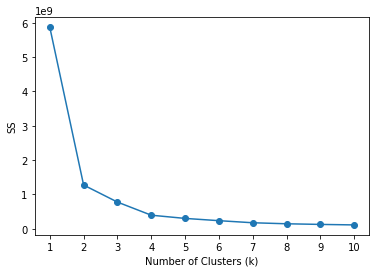

In [48]:
k_range = range(1,11)
SS = []

for k in k_range:
    KM = KMeans(n_clusters=k)
    KM.fit(stat_matrix)
    SS.append(KM.inertia_)
    
plt.plot(k_range, SS, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SS')
plt.xticks(k_range)
plt.show()

In [8]:
best=0

for n_clusters in range(2,11):
    KM = KMeans(n_clusters=n_clusters)
    KM_labels = KM.fit_predict(stat_matrix)
    silhouette_avg = silhouette_score(stat_matrix, KM_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best:
        best = silhouette_avg
        best_n_clusters = n_clusters
        
print('Optimal KMeans n_clusters parameter:', best_n_clusters)

For n_clusters = 2 The average silhouette_score is : 0.7459918592872101
For n_clusters = 3 The average silhouette_score is : 0.6249124774846647
For n_clusters = 4 The average silhouette_score is : 0.6288375516360286
For n_clusters = 5 The average silhouette_score is : 0.620887454495733
For n_clusters = 6 The average silhouette_score is : 0.568544200289893
For n_clusters = 7 The average silhouette_score is : 0.5316708956850712
For n_clusters = 8 The average silhouette_score is : 0.5212950705770156
For n_clusters = 9 The average silhouette_score is : 0.5181887518661138
For n_clusters = 10 The average silhouette_score is : 0.4943493225214256
Optimal KMeans n_clusters parameter: 2


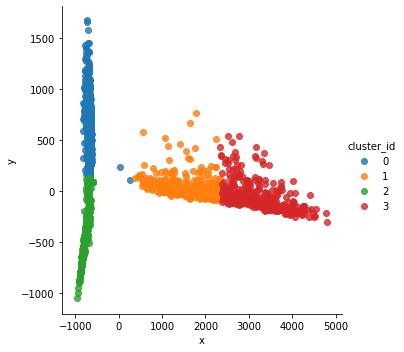

In [87]:
# cluster_df = stat_matrix.copy()

# pca = PCA(n_components=3)
# XY = pca.fit_transform(cluster_df)
# # pca.explained_variance_ratio_.cumsum()


# KM = KMeans(n_clusters=4)
# labels = KM.fit_predict(cluster_df)

# cluster_df['cluster_id'] = labels
# cluster_df['POS'] = positions
# cluster_df['x'] = XY[:,0]
# cluster_df['y'] = XY[:,1]

# sns.lmplot(data=cluster_df, x='x', y='y', hue='cluster_id', fit_reg=False, legend=True, legend_out=True)
# plt.show()

Results from n_clusters = 4 <br>

0 = RB's and QB's that run <br>
1 = Bad QB's (Pass Yds < 3001) <br>
2 = Pass Catchers (WR & TE) <br>
3 = Good QB's (Pass Yds > 3000) <br>

In [70]:
cluster_df[cluster_df.cluster_id == 0].sort_values('PASS YDS', ascending=False).head()

,PASS YDS,PASS TDS,INT,RUSH YDS,RUSH TDS,REC,REC YDS,REC TDS,FUM LST,PTS / GM,cluster_id,POS,x,y
NAME,,,,,,,,,,,,,,
Mike McMahon,874,7,9,96,3,1,7,0,0,9.4,0,QB,261.735393,107.591584
Tim Tebow,654,5,3,227,6,0,0,0,0,11.0,0,QB,40.617052,233.213301
Christian McCaffrey,50,1,0,1098,7,107,867,6,1,17.4,0,RB,-757.314063,479.352678
LaDainian Tomlinson,47,3,0,1462,18,51,370,2,1,19.7,0,RB,-685.541104,1064.149684
Ronnie Brown,41,1,0,916,10,33,254,0,1,11.3,0,RB,-642.640588,687.856414


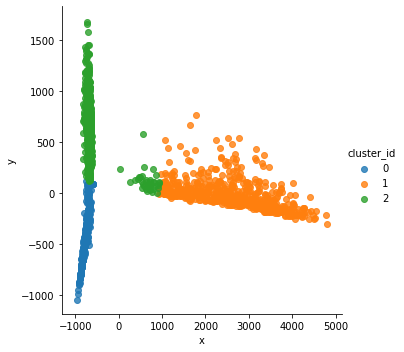

In [39]:
# cluster_df2 = stat_matrix.copy()

# pca = PCA(n_components=4)
# XY = pca.fit_transform(cluster_df2)

# KM = KMeans(n_clusters=3)
# labels = KM.fit_predict(cluster_df2)

# cluster_df2['cluster_id'] = labels
# cluster_df2['POS'] = positions
# cluster_df2['x'] = XY[:,0]
# cluster_df2['y'] = XY[:,1]

# sns.lmplot(data=cluster_df2, x='x', y='y', hue='cluster_id', fit_reg=False, legend=True, legend_out=True)
# plt.show()

Results from n_clusters = 3 <br>

0 = Pass Catchers (WR & TE) <br>
1 = QB's <br>
2 = RB's and QB's that run <br>

In [71]:
cluster_df2[(cluster_df2.cluster_id == 2) & (cluster_df2.POS != 'RB')].head()

,PASS YDS,PASS TDS,INT,RUSH YDS,RUSH TDS,REC,REC YDS,REC TDS,FUM LST,PTS / GM,cluster_id,POS,x,y
NAME,,,,,,,,,,,,,,
Lamar Jackson,1201,6,3,695,5,0,0,0,4,9.8,2,QB,554.207153,576.652800
Jeff Driskel,1003,6,2,130,2,0,0,0,1,9.5,2,QB,387.923649,130.533431
CJ Beathard,1430,4,6,136,3,0,0,0,2,12.7,2,QB,806.671230,106.365885
Tavon Austin,0,0,0,434,4,52,473,5,2,8.8,2,WR,-699.765116,171.608423
Johnny Manziel,1500,7,5,230,0,0,0,0,3,10.6,2,QB,870.715760,178.039233


In [78]:
WR_TE = ALL.copy()
WR_TE = WR_TE[WR_TE.POS != 'QB']
WR_TE = WR_TE[WR_TE.POS != 'RB']
WR_TE_positions = list(WR_TE['POS'])
WR_TE = WR_TE.drop(columns=['POS', 'TEAM', 'PTS', 'RANK', 'GMS'])
WR_TE = WR_TE.set_index('NAME')

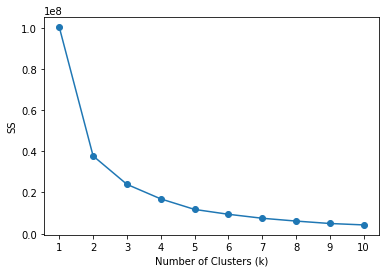

In [79]:
k_range = range(1,11)
SS = []

for k in k_range:
    KM = KMeans(n_clusters=k)
    KM.fit(WR_TE)
    SS.append(KM.inertia_)
    
plt.plot(k_range, SS, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SS')
plt.xticks(k_range)
plt.show()

In [80]:
for n_clusters in range(2,11):
    KM = KMeans(n_clusters=n_clusters)
    KM_labels = KM.fit_predict(WR_TE)
    silhouette_avg = silhouette_score(WR_TE, KM_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best:
        best = silhouette_avg
        best_n_clusters = n_clusters
        
print('Optimal KMeans n_clusters parameter:', best_n_clusters)

For n_clusters = 2 The average silhouette_score is : 0.5805226909841934
For n_clusters = 3 The average silhouette_score is : 0.48940033575972625
For n_clusters = 4 The average silhouette_score is : 0.490177113931559
For n_clusters = 5 The average silhouette_score is : 0.5002775304073879
For n_clusters = 6 The average silhouette_score is : 0.45864909511240237
For n_clusters = 7 The average silhouette_score is : 0.4626162547284701
For n_clusters = 8 The average silhouette_score is : 0.4654966964423804
For n_clusters = 9 The average silhouette_score is : 0.4567214453052691
For n_clusters = 10 The average silhouette_score is : 0.4468662152356689
Optimal KMeans n_clusters parameter: 2


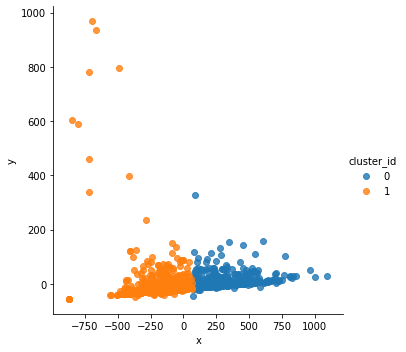

In [81]:
# pca = PCA(n_components=4)
# XY = pca.fit_transform(WR_TE)
# pca.explained_variance_ratio_.cumsum()
# KM = KMeans(n_clusters=2)
# labels = KM.fit_predict(WR_TE)

# WR_TE['cluster_id'] = labels
# WR_TE['POS'] = WR_TE_positions
# WR_TE['x'] = XY[:,0]
# WR_TE['y'] = XY[:,1]

# sns.lmplot(data=WR_TE, x='x', y='y', hue='cluster_id', fit_reg=False, legend=True, legend_out=True)
# plt.show()

WR_TE dataframe; Results from n_clusters = 2 <br>
0 = mean receiving yards > 700 <br>
1 = mean receiving yards < 700

In [86]:
print(WR_TE[WR_TE.cluster_id == 0]['REC YDS'].mean())
print(WR_TE[WR_TE.cluster_id == 1]['REC YDS'].mean())

1170.4045977011494
697.2314694408323


In [73]:
# from sklearn.cluster import SpectralClustering

# for n_clusters in range(2,11):
#     SC = SpectralClustering(n_clusters=n_clusters)
#     SC_labels = SC.fit_predict(matrix)
#     silhouette_avg = silhouette_score(matrix, SC_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)
#     if silhouette_avg > best:
#         best = silhouette_avg
#         best_n_clusters = n_clusters
        
# print('Optimal SpectralClustering n_clusters parameter:', best_n_clusters)